### Домашнее задание к лекции "Визуализация данных". Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.
EDA:

#### Требования к анализу:
* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [16]:
import requests
import time
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#data = pd.read_csv('names/yob2017.txt',names=['Name', 'Gender', 'Count'])
data = pd.read_csv('bundle_archive/book_data.csv')

In [68]:
data.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [67]:
genres = ['Young Adult', 'Fiction', 'Science', 'Fantasy',
       'Classics', 'Historical', 'School', 'Sports', 'Nonfiction', 
        'Psychology', 'Health', 'Philosophy', 'Literature']

In [70]:
for genre in genres:
    data[genre] = data.apply(lambda row: row.book_rating if genre in row.genres else None, axis=1)

TypeError: argument of type 'float' is not iterable

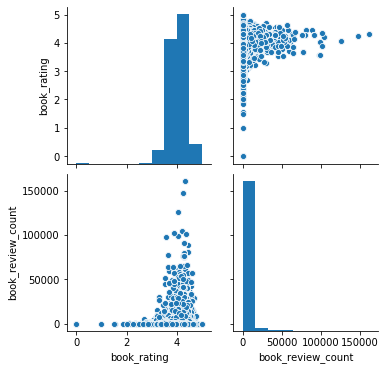

In [25]:
sns_plot = sns.pairplot(
    data[['book_pages_', 'book_rating', 'book_format', 'book_review_count']])
sns_plot